# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [110]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


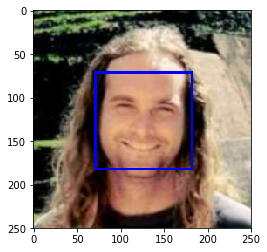

In [111]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [81]:
import cv2                

# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
* Human Files: 98% detected human faces
* Dog Files: 17% detected human faces

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
for file in human_files_short:
    human_count += face_detector(file)
print('Human Files: %d%% detected human faces' % (human_count))

human_count = 0
for file in dog_files_short:
    human_count += face_detector(file)
print('Dog Files: %d%% detected human faces' % (human_count))


Human Files: 98% detected human faces
Dog Files: 17% detected human faces


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [75]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [14]:
#VGG16

In [70]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

def load_image(img_path):
    '''
    Load an image from the given path and preprocess it for VGG16.
    
    Args:
        img_path: path to an image
        
    Returns:
        Image tensor with shape batch_size, channels, height, width (1, 3, 224, 224)
    '''
    image = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([
                        transforms.Resize((224, 224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load an image.
    image = load_image(img_path)

    if use_cuda:
        VGG16.cuda()
        image = image.cuda()
    
    VGG16.eval()
    output = VGG16(image)
    softmax = F.softmax(output, dim=1)
    predicted_class_index_tensor = torch.max(softmax, dim=1)[1]
    if use_cuda:
        predicted_class_index_tensor = predicted_class_index_tensor.cpu()
    predicted_class_index = predicted_class_index_tensor.numpy()[0]
    return predicted_class_index

# VGG16_predict("images/American_water_spaniel_00648.jpg")

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [66]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_class_index = VGG16_predict(img_path)
    return (predicted_class_index > 150 and predicted_class_index < 269) # true/false
# dog_detector("images/American_water_spaniel_00648.jpg")

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

* Human Files: 0% detected dog faces
* Dog Files: 100% detected dog faces

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_count = 0
for file in human_files_short:
    dog_count += dog_detector(file)
print('Human Files: %d%% detected dog faces' % (dog_count))

dog_count = 0
for file in dog_files_short:
    dog_count += dog_detector(file)
print('Dog Files: %d%% detected dog faces' % (dog_count))

Human Files: 0% detected dog faces
Dog Files: 100% detected dog faces


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [3]:
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# check if CUDA is available
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
print("Device:", device)

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
## batch_size is the same as that used in the orignal VGG16 paper.
def create_data_loader(dir_path, is_train=False, batch_size=256):
    if is_train:
        in_transform = transforms.Compose([
                            transforms.RandomRotation(degrees=90),
                            transforms.Resize((224, 224)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.ToTensor(),
                            transforms.Normalize((0.485, 0.456, 0.406), 
                                                 (0.229, 0.224, 0.225))])
    else:
        in_transform = transforms.Compose([
                            transforms.Resize((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.485, 0.456, 0.406), 
                                                 (0.229, 0.224, 0.225))])
    data = datasets.ImageFolder(dir_path, transform=in_transform, target_transform=None)
    image_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=is_train, num_workers=4)
    return image_loader


def create_loaders(img_path, has_subfolders=True, batch_size=256):
    loaders_scratch = {}
    if has_subfolders:
        train_path = img_path + '/train'
        valid_path = img_path + '/valid'
        test_path = img_path + '/test'
    else:
        train_path = img_path
        valid_path = img_path
        test_path = img_path
    loaders_scratch['train'] = create_data_loader(train_path, True, batch_size=batch_size)
    loaders_scratch['valid'] = create_data_loader(valid_path, False, batch_size=batch_size)
    loaders_scratch['test'] = create_data_loader(test_path, False, batch_size=batch_size)
    return loaders_scratch


Device: cuda:0


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* Stretching. 224, 224 the same size as VGG16 to compare the performances with the same resolution of photos.
* Yes. Flip and rotations. I did not crop in order to make sure I didn't crop out a dog.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

### More BatchNorms & Learning Rate Decay

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Architecture #2 - WINNER!!!! ################################
class Net2(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, num_classes=133):
        super(Net2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(192),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.FLATTEN_SIZE = 256 * 6 * 6
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(self.FLATTEN_SIZE, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
    
    def forward(self, x):
        ## Define forward behavior
        x = self.features(x)
        x = x.view(x.size(0), self.FLATTEN_SIZE)
        x = self.classifier(x)
        return x

# EXPERIMENT 2 ======================================================
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net2(133)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Final architecture: Net2 above.

I first tried VGG16 architecture and learned that the model was barely learning anything. I think it's because I have too few data for such many parameters to train. Hance, I reduced the size greatly by adapting AlexNet with two extra bath normalization layers added (Experiment #1, Architecture #1 Net). I also configured my ReLU layers to perform in place because I kept running out of CUDA memory without it for the VGG16 training. With AlexNet, I saw a much faster pace of learning with the training and validation loss decreasing greatly at each early epochs. However, the model quickly overfit. So, I ended up applying batch normalization to all convolutional layer inputs except the first one in addition to decreasing the learning rate by a factor of 10 whenever validation loss did not decrease(Experiment #2, Architecture #2 - Net2). The minimum validation loss decreased. However, the model seems to quickly stop learning much. I read somewhere that momemtum doesn't really help with learning. So, I removed the momentum by setting it to the default value 0. And, the final model started to learn for a long time and ended up performing the best! (Experiment #3, Architecture #2 - Net2)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, weight_decay=0.0005)

if use_cuda:
    criterion_scratch = criterion_scratch.cuda()

loaders_scratch = create_loaders('dogImages', True, batch_size=32)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [7]:
import numpy as np


def train3(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, start_epoch=1):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(start_epoch, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            if batch_idx%20 == 0:
                print('Epoch: {} \tTrain Batch: {} \tTraining Loss: {:.6f}'.format(
                    epoch, 
                    batch_idx,
                    train_loss
                    ))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            if batch_idx%20 == 0:
                print('Epoch: {} \tEval Batch: {} \tValidation Loss: {:.6f}'.format(
                    epoch, 
                    batch_idx,
                    valid_loss
                    ))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model_scratch.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# train the model, epoch=100
model_scratch = train3(100, loaders_scratch, model_scratch, optimizer_scratch, 
                       criterion_scratch, use_cuda, 'model_scratch_v3.pt', 1)

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch_v3.pt'))

Epoch: 1 	Train Batch: 0 	Training Loss: 4.899663
Epoch: 1 	Train Batch: 20 	Training Loss: 4.891515
Epoch: 1 	Train Batch: 40 	Training Loss: 4.886625
Epoch: 1 	Train Batch: 60 	Training Loss: 4.885201
Epoch: 1 	Train Batch: 80 	Training Loss: 4.885793
Epoch: 1 	Train Batch: 100 	Training Loss: 4.883962
Epoch: 1 	Train Batch: 120 	Training Loss: 4.883111
Epoch: 1 	Train Batch: 140 	Training Loss: 4.881094
Epoch: 1 	Train Batch: 160 	Training Loss: 4.878327
Epoch: 1 	Train Batch: 180 	Training Loss: 4.878655
Epoch: 1 	Train Batch: 200 	Training Loss: 4.877970
Epoch: 1 	Eval Batch: 0 	Validation Loss: 4.842398
Epoch: 1 	Eval Batch: 20 	Validation Loss: 4.842398
Epoch: 1 	Training Loss: 4.877651 	Validation Loss: 4.842398
Validation loss decreased (inf --> 4.842398).  Saving model ...
Epoch: 2 	Train Batch: 0 	Training Loss: 4.856989
Epoch: 2 	Train Batch: 20 	Training Loss: 4.840892
Epoch: 2 	Train Batch: 40 	Training Loss: 4.836544
Epoch: 2 	Train Batch: 60 	Training Loss: 4.838330
Epo

Epoch: 11 	Train Batch: 140 	Training Loss: 3.862621
Epoch: 11 	Train Batch: 160 	Training Loss: 3.862329
Epoch: 11 	Train Batch: 180 	Training Loss: 3.860484
Epoch: 11 	Train Batch: 200 	Training Loss: 3.850270
Epoch: 11 	Eval Batch: 0 	Validation Loss: 3.860701
Epoch: 11 	Eval Batch: 20 	Validation Loss: 3.860701
Epoch: 11 	Training Loss: 3.848233 	Validation Loss: 3.860701
Validation loss decreased (3.986746 --> 3.860701).  Saving model ...
Epoch: 12 	Train Batch: 0 	Training Loss: 4.094330
Epoch: 12 	Train Batch: 20 	Training Loss: 3.820455
Epoch: 12 	Train Batch: 40 	Training Loss: 3.780475
Epoch: 12 	Train Batch: 60 	Training Loss: 3.789708
Epoch: 12 	Train Batch: 80 	Training Loss: 3.788655
Epoch: 12 	Train Batch: 100 	Training Loss: 3.790237
Epoch: 12 	Train Batch: 120 	Training Loss: 3.802256
Epoch: 12 	Train Batch: 140 	Training Loss: 3.799881
Epoch: 12 	Train Batch: 160 	Training Loss: 3.786175
Epoch: 12 	Train Batch: 180 	Training Loss: 3.791195
Epoch: 12 	Train Batch: 200 

Epoch: 22 	Train Batch: 0 	Training Loss: 3.286849
Epoch: 22 	Train Batch: 20 	Training Loss: 3.201786
Epoch: 22 	Train Batch: 40 	Training Loss: 3.223641
Epoch: 22 	Train Batch: 60 	Training Loss: 3.224791
Epoch: 22 	Train Batch: 80 	Training Loss: 3.193921
Epoch: 22 	Train Batch: 100 	Training Loss: 3.197701
Epoch: 22 	Train Batch: 120 	Training Loss: 3.211090
Epoch: 22 	Train Batch: 140 	Training Loss: 3.208796
Epoch: 22 	Train Batch: 160 	Training Loss: 3.214972
Epoch: 22 	Train Batch: 180 	Training Loss: 3.206065
Epoch: 22 	Train Batch: 200 	Training Loss: 3.202722
Epoch: 22 	Eval Batch: 0 	Validation Loss: 2.913784
Epoch: 22 	Eval Batch: 20 	Validation Loss: 2.913784
Epoch: 22 	Training Loss: 3.206239 	Validation Loss: 2.913784
Validation loss decreased (2.958544 --> 2.913784).  Saving model ...
Epoch: 23 	Train Batch: 0 	Training Loss: 3.225441
Epoch: 23 	Train Batch: 20 	Training Loss: 3.225718
Epoch: 23 	Train Batch: 40 	Training Loss: 3.205039
Epoch: 23 	Train Batch: 60 	Trai

Epoch: 32 	Eval Batch: 20 	Validation Loss: 2.672999
Epoch: 32 	Training Loss: 2.714322 	Validation Loss: 2.672999
Epoch: 33 	Train Batch: 0 	Training Loss: 2.516093
Epoch: 33 	Train Batch: 20 	Training Loss: 2.528562
Epoch: 33 	Train Batch: 40 	Training Loss: 2.565861
Epoch: 33 	Train Batch: 60 	Training Loss: 2.608754
Epoch: 33 	Train Batch: 80 	Training Loss: 2.627000
Epoch: 33 	Train Batch: 100 	Training Loss: 2.646087
Epoch: 33 	Train Batch: 120 	Training Loss: 2.637311
Epoch: 33 	Train Batch: 140 	Training Loss: 2.642081
Epoch: 33 	Train Batch: 160 	Training Loss: 2.655481
Epoch: 33 	Train Batch: 180 	Training Loss: 2.668723
Epoch: 33 	Train Batch: 200 	Training Loss: 2.671740
Epoch: 33 	Eval Batch: 0 	Validation Loss: 2.606550
Epoch: 33 	Eval Batch: 20 	Validation Loss: 2.606550
Epoch: 33 	Training Loss: 2.672394 	Validation Loss: 2.606550
Epoch: 34 	Train Batch: 0 	Training Loss: 2.621407
Epoch: 34 	Train Batch: 20 	Training Loss: 2.590626
Epoch: 34 	Train Batch: 40 	Training L

Epoch: 43 	Eval Batch: 0 	Validation Loss: 2.679307
Epoch: 43 	Eval Batch: 20 	Validation Loss: 2.679307
Epoch: 43 	Training Loss: 2.237393 	Validation Loss: 2.679307
Epoch: 44 	Train Batch: 0 	Training Loss: 2.362163
Epoch: 44 	Train Batch: 20 	Training Loss: 2.106246
Epoch: 44 	Train Batch: 40 	Training Loss: 2.143342
Epoch: 44 	Train Batch: 60 	Training Loss: 2.202408
Epoch: 44 	Train Batch: 80 	Training Loss: 2.191857
Epoch: 44 	Train Batch: 100 	Training Loss: 2.186137
Epoch: 44 	Train Batch: 120 	Training Loss: 2.191085
Epoch: 44 	Train Batch: 140 	Training Loss: 2.192054
Epoch: 44 	Train Batch: 160 	Training Loss: 2.188920
Epoch: 44 	Train Batch: 180 	Training Loss: 2.200578
Epoch: 44 	Train Batch: 200 	Training Loss: 2.203408
Epoch: 44 	Eval Batch: 0 	Validation Loss: 2.003623
Epoch: 44 	Eval Batch: 20 	Validation Loss: 2.003623
Epoch: 44 	Training Loss: 2.203298 	Validation Loss: 2.003623
Validation loss decreased (2.065732 --> 2.003623).  Saving model ...
Epoch: 45 	Train Bat

Epoch: 54 	Train Batch: 180 	Training Loss: 1.855402
Epoch: 54 	Train Batch: 200 	Training Loss: 1.873502
Epoch: 54 	Eval Batch: 0 	Validation Loss: 2.090423
Epoch: 54 	Eval Batch: 20 	Validation Loss: 2.090423
Epoch: 54 	Training Loss: 1.870657 	Validation Loss: 2.090423
Epoch: 55 	Train Batch: 0 	Training Loss: 1.716195
Epoch: 55 	Train Batch: 20 	Training Loss: 1.742178
Epoch: 55 	Train Batch: 40 	Training Loss: 1.780910
Epoch: 55 	Train Batch: 60 	Training Loss: 1.815116
Epoch: 55 	Train Batch: 80 	Training Loss: 1.811785
Epoch: 55 	Train Batch: 100 	Training Loss: 1.835704
Epoch: 55 	Train Batch: 120 	Training Loss: 1.836667
Epoch: 55 	Train Batch: 140 	Training Loss: 1.828812
Epoch: 55 	Train Batch: 160 	Training Loss: 1.830898
Epoch: 55 	Train Batch: 180 	Training Loss: 1.840297
Epoch: 55 	Train Batch: 200 	Training Loss: 1.839571
Epoch: 55 	Eval Batch: 0 	Validation Loss: 1.870281
Epoch: 55 	Eval Batch: 20 	Validation Loss: 1.870281
Epoch: 55 	Training Loss: 1.842552 	Validatio

Epoch: 65 	Train Batch: 140 	Training Loss: 1.520734
Epoch: 65 	Train Batch: 160 	Training Loss: 1.534874
Epoch: 65 	Train Batch: 180 	Training Loss: 1.526341
Epoch: 65 	Train Batch: 200 	Training Loss: 1.526986
Epoch: 65 	Eval Batch: 0 	Validation Loss: 1.028653
Epoch: 65 	Eval Batch: 20 	Validation Loss: 1.028653
Epoch: 65 	Training Loss: 1.531628 	Validation Loss: 1.028653
Validation loss decreased (1.298819 --> 1.028653).  Saving model ...
Epoch: 66 	Train Batch: 0 	Training Loss: 1.468082
Epoch: 66 	Train Batch: 20 	Training Loss: 1.424338
Epoch: 66 	Train Batch: 40 	Training Loss: 1.459778
Epoch: 66 	Train Batch: 60 	Training Loss: 1.479238
Epoch: 66 	Train Batch: 80 	Training Loss: 1.478020
Epoch: 66 	Train Batch: 100 	Training Loss: 1.460560
Epoch: 66 	Train Batch: 120 	Training Loss: 1.460130
Epoch: 66 	Train Batch: 140 	Training Loss: 1.463044
Epoch: 66 	Train Batch: 160 	Training Loss: 1.467835
Epoch: 66 	Train Batch: 180 	Training Loss: 1.469845
Epoch: 66 	Train Batch: 200 

Epoch: 76 	Train Batch: 120 	Training Loss: 1.192180
Epoch: 76 	Train Batch: 140 	Training Loss: 1.195661
Epoch: 76 	Train Batch: 160 	Training Loss: 1.207698
Epoch: 76 	Train Batch: 180 	Training Loss: 1.204672
Epoch: 76 	Train Batch: 200 	Training Loss: 1.211045
Epoch: 76 	Eval Batch: 0 	Validation Loss: 1.011214
Epoch: 76 	Eval Batch: 20 	Validation Loss: 1.011214
Epoch: 76 	Training Loss: 1.215486 	Validation Loss: 1.011214
Validation loss decreased (1.028653 --> 1.011214).  Saving model ...
Epoch: 77 	Train Batch: 0 	Training Loss: 1.051757
Epoch: 77 	Train Batch: 20 	Training Loss: 1.095429
Epoch: 77 	Train Batch: 40 	Training Loss: 1.095623
Epoch: 77 	Train Batch: 60 	Training Loss: 1.132398
Epoch: 77 	Train Batch: 80 	Training Loss: 1.157507
Epoch: 77 	Train Batch: 100 	Training Loss: 1.162941
Epoch: 77 	Train Batch: 120 	Training Loss: 1.162553
Epoch: 77 	Train Batch: 140 	Training Loss: 1.175487
Epoch: 77 	Train Batch: 160 	Training Loss: 1.199384
Epoch: 77 	Train Batch: 180 

Epoch: 87 	Train Batch: 60 	Training Loss: 0.973036
Epoch: 87 	Train Batch: 80 	Training Loss: 0.961878
Epoch: 87 	Train Batch: 100 	Training Loss: 0.952836
Epoch: 87 	Train Batch: 120 	Training Loss: 0.960975
Epoch: 87 	Train Batch: 140 	Training Loss: 0.964565
Epoch: 87 	Train Batch: 160 	Training Loss: 0.972583
Epoch: 87 	Train Batch: 180 	Training Loss: 0.972668
Epoch: 87 	Train Batch: 200 	Training Loss: 0.975317
Epoch: 87 	Eval Batch: 0 	Validation Loss: 1.350147
Epoch: 87 	Eval Batch: 20 	Validation Loss: 1.350147
Epoch: 87 	Training Loss: 0.983072 	Validation Loss: 1.350147
Epoch: 88 	Train Batch: 0 	Training Loss: 0.895982
Epoch: 88 	Train Batch: 20 	Training Loss: 0.928121
Epoch: 88 	Train Batch: 40 	Training Loss: 0.894193
Epoch: 88 	Train Batch: 60 	Training Loss: 0.898905
Epoch: 88 	Train Batch: 80 	Training Loss: 0.904537
Epoch: 88 	Train Batch: 100 	Training Loss: 0.911803
Epoch: 88 	Train Batch: 120 	Training Loss: 0.928352
Epoch: 88 	Train Batch: 140 	Training Loss: 0.

Epoch: 98 	Train Batch: 40 	Training Loss: 0.804346
Epoch: 98 	Train Batch: 60 	Training Loss: 0.790031
Epoch: 98 	Train Batch: 80 	Training Loss: 0.761903
Epoch: 98 	Train Batch: 100 	Training Loss: 0.760365
Epoch: 98 	Train Batch: 120 	Training Loss: 0.769929
Epoch: 98 	Train Batch: 140 	Training Loss: 0.774873
Epoch: 98 	Train Batch: 160 	Training Loss: 0.781982
Epoch: 98 	Train Batch: 180 	Training Loss: 0.784850
Epoch: 98 	Train Batch: 200 	Training Loss: 0.794210
Epoch: 98 	Eval Batch: 0 	Validation Loss: 1.132937
Epoch: 98 	Eval Batch: 20 	Validation Loss: 1.132937
Epoch: 98 	Training Loss: 0.795859 	Validation Loss: 1.132937
Epoch: 99 	Train Batch: 0 	Training Loss: 0.870264
Epoch: 99 	Train Batch: 20 	Training Loss: 0.678295
Epoch: 99 	Train Batch: 40 	Training Loss: 0.731584
Epoch: 99 	Train Batch: 60 	Training Loss: 0.757201
Epoch: 99 	Train Batch: 80 	Training Loss: 0.770930
Epoch: 99 	Train Batch: 100 	Training Loss: 0.781055
Epoch: 99 	Train Batch: 120 	Training Loss: 0.7

Model learning until the last 100th epoch
* Test Loss: 2.788943
* Test Accuracy: 41% (343/836)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [85]:
import numpy as np

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [9]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.788943


Test Accuracy: 41% (343/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [4]:
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# check if CUDA is available
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
print("Device:", device)

data_transfer = {}

## batch_size is the same as that used in the orignal VGG16 paper.
def create_data_loader(dir_path, is_train=False, batch_size=256):
    if is_train:
        in_transform = transforms.Compose([
                            transforms.RandomRotation(degrees=90),
                            transforms.Resize((224, 224)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.ToTensor(),
                            transforms.Normalize((0.485, 0.456, 0.406), 
                                                 (0.229, 0.224, 0.225))])
    else:
        in_transform = transforms.Compose([
                            transforms.Resize((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.485, 0.456, 0.406), 
                                                 (0.229, 0.224, 0.225))])
    data = datasets.ImageFolder(dir_path, transform=in_transform, target_transform=None)
    if is_train:
        data_transfer['train'] = data
    image_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=is_train, num_workers=4)
    return image_loader


def create_loaders(img_path, has_subfolders=True, batch_size=256):
    loaders_scratch = {}
    if has_subfolders:
        train_path = img_path + '/train'
        valid_path = img_path + '/valid'
        test_path = img_path + '/test'
    else:
        train_path = img_path
        valid_path = img_path
        test_path = img_path
    loaders_scratch['train'] = create_data_loader(train_path, True, batch_size=batch_size)
    loaders_scratch['valid'] = create_data_loader(valid_path, False, batch_size=batch_size)
    loaders_scratch['test'] = create_data_loader(test_path, False, batch_size=batch_size)
    return loaders_scratch
loaders_transfer = create_loaders('dogImages', True, batch_size=32)

Device: cuda:0


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [10]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.resnet18(pretrained=True)

# Freeze the early feature layers
for param in model_transfer.parameters():
    param.requires_grad = False

# Change the output class count
model_transfer.fc = nn.Linear(in_features=512, out_features=133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I tried a few different experiments with two different architectures: AlexNet and ResNet18. I tried AlexNet to see the pure effect of pre-training a model of the same architecture to the model_scratch. Adopting what we learned from Style Transfer Learning lesson, I wanted to see the effect of freezing only a few selected layers. And then, I wanted to see the effect of a model deeper. Hence, I finally try ResNet16 model and compare it against AlexNet. (1) Pretrained AlexNet with all layers fine-tuned ended in 55% test accuracy. (2) Pretrained AlexNet with the first three convolutional layers frozen (style-reltaed and probably not content related) ended in 59% test accuracy. (3) Pretrained AlexNet with all layers frozen except the last layer ended in 65% test accuracy. (4) Pretrained ResNet16 with all layers frozen except the last layer ended in 81% test accuracy. Hence, ResNet18 is the chosen winner pre-trained model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [87]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01, weight_decay=0.0005)

if use_cuda:
    criterion_transfer = criterion_transfer.cuda()

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [8]:
# train the model
model_transfer = train3(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer,
                          use_cuda, 'model_transfer_resnet.pt', 1)

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer_resnet.pt'))

Epoch: 1 	Train Batch: 0 	Training Loss: 5.023550
Epoch: 1 	Train Batch: 20 	Training Loss: 5.015308
Epoch: 1 	Train Batch: 40 	Training Loss: 4.970042
Epoch: 1 	Train Batch: 60 	Training Loss: 4.912065
Epoch: 1 	Train Batch: 80 	Training Loss: 4.860831
Epoch: 1 	Train Batch: 100 	Training Loss: 4.812547
Epoch: 1 	Train Batch: 120 	Training Loss: 4.769690
Epoch: 1 	Train Batch: 140 	Training Loss: 4.726911
Epoch: 1 	Train Batch: 160 	Training Loss: 4.685254
Epoch: 1 	Train Batch: 180 	Training Loss: 4.641387
Epoch: 1 	Train Batch: 200 	Training Loss: 4.600260
Epoch: 1 	Eval Batch: 0 	Validation Loss: 4.037672
Epoch: 1 	Eval Batch: 20 	Validation Loss: 4.037672
Epoch: 1 	Training Loss: 4.583211 	Validation Loss: 4.037672
Validation loss decreased (inf --> 4.037672).  Saving model ...
Epoch: 2 	Train Batch: 0 	Training Loss: 4.089297
Epoch: 2 	Train Batch: 20 	Training Loss: 4.082132
Epoch: 2 	Train Batch: 40 	Training Loss: 4.054924
Epoch: 2 	Train Batch: 60 	Training Loss: 4.028862
Epo

Epoch: 11 	Train Batch: 140 	Training Loss: 1.703079
Epoch: 11 	Train Batch: 160 	Training Loss: 1.709862
Epoch: 11 	Train Batch: 180 	Training Loss: 1.710043
Epoch: 11 	Train Batch: 200 	Training Loss: 1.705536
Epoch: 11 	Eval Batch: 0 	Validation Loss: 1.460766
Epoch: 11 	Eval Batch: 20 	Validation Loss: 1.460766
Epoch: 11 	Training Loss: 1.700496 	Validation Loss: 1.460766
Validation loss decreased (1.654945 --> 1.460766).  Saving model ...
Epoch: 12 	Train Batch: 0 	Training Loss: 1.832846
Epoch: 12 	Train Batch: 20 	Training Loss: 1.680337
Epoch: 12 	Train Batch: 40 	Training Loss: 1.620019
Epoch: 12 	Train Batch: 60 	Training Loss: 1.606516
Epoch: 12 	Train Batch: 80 	Training Loss: 1.631805
Epoch: 12 	Train Batch: 100 	Training Loss: 1.627364
Epoch: 12 	Train Batch: 120 	Training Loss: 1.621414
Epoch: 12 	Train Batch: 140 	Training Loss: 1.613979
Epoch: 12 	Train Batch: 160 	Training Loss: 1.623652
Epoch: 12 	Train Batch: 180 	Training Loss: 1.624955
Epoch: 12 	Train Batch: 200 

Epoch: 22 	Train Batch: 20 	Training Loss: 1.201248
Epoch: 22 	Train Batch: 40 	Training Loss: 1.213390
Epoch: 22 	Train Batch: 60 	Training Loss: 1.208780
Epoch: 22 	Train Batch: 80 	Training Loss: 1.226754
Epoch: 22 	Train Batch: 100 	Training Loss: 1.232288
Epoch: 22 	Train Batch: 120 	Training Loss: 1.237785
Epoch: 22 	Train Batch: 140 	Training Loss: 1.235911
Epoch: 22 	Train Batch: 160 	Training Loss: 1.238721
Epoch: 22 	Train Batch: 180 	Training Loss: 1.243751
Epoch: 22 	Train Batch: 200 	Training Loss: 1.251029
Epoch: 22 	Eval Batch: 0 	Validation Loss: 1.306962
Epoch: 22 	Eval Batch: 20 	Validation Loss: 1.306962
Epoch: 22 	Training Loss: 1.253637 	Validation Loss: 1.306962
Epoch: 23 	Train Batch: 0 	Training Loss: 1.758551
Epoch: 23 	Train Batch: 20 	Training Loss: 1.292083
Epoch: 23 	Train Batch: 40 	Training Loss: 1.259817
Epoch: 23 	Train Batch: 60 	Training Loss: 1.246451
Epoch: 23 	Train Batch: 80 	Training Loss: 1.262389
Epoch: 23 	Train Batch: 100 	Training Loss: 1.26

Epoch: 32 	Eval Batch: 20 	Validation Loss: 0.826962
Epoch: 32 	Training Loss: 1.079242 	Validation Loss: 0.826962
Epoch: 33 	Train Batch: 0 	Training Loss: 1.048591
Epoch: 33 	Train Batch: 20 	Training Loss: 0.984443
Epoch: 33 	Train Batch: 40 	Training Loss: 1.043509
Epoch: 33 	Train Batch: 60 	Training Loss: 1.063080
Epoch: 33 	Train Batch: 80 	Training Loss: 1.052597
Epoch: 33 	Train Batch: 100 	Training Loss: 1.058416
Epoch: 33 	Train Batch: 120 	Training Loss: 1.062484
Epoch: 33 	Train Batch: 140 	Training Loss: 1.070489
Epoch: 33 	Train Batch: 160 	Training Loss: 1.074296
Epoch: 33 	Train Batch: 180 	Training Loss: 1.070058
Epoch: 33 	Train Batch: 200 	Training Loss: 1.071657
Epoch: 33 	Eval Batch: 0 	Validation Loss: 0.925807
Epoch: 33 	Eval Batch: 20 	Validation Loss: 0.925807
Epoch: 33 	Training Loss: 1.076237 	Validation Loss: 0.925807
Epoch: 34 	Train Batch: 0 	Training Loss: 0.953997
Epoch: 34 	Train Batch: 20 	Training Loss: 1.030255
Epoch: 34 	Train Batch: 40 	Training L

Epoch: 43 	Eval Batch: 0 	Validation Loss: 1.385436
Epoch: 43 	Eval Batch: 20 	Validation Loss: 1.385436
Epoch: 43 	Training Loss: 0.990950 	Validation Loss: 1.385436
Epoch: 44 	Train Batch: 0 	Training Loss: 1.122586
Epoch: 44 	Train Batch: 20 	Training Loss: 0.944617
Epoch: 44 	Train Batch: 40 	Training Loss: 0.970384
Epoch: 44 	Train Batch: 60 	Training Loss: 0.999726
Epoch: 44 	Train Batch: 80 	Training Loss: 0.993731
Epoch: 44 	Train Batch: 100 	Training Loss: 0.985761
Epoch: 44 	Train Batch: 120 	Training Loss: 0.993508
Epoch: 44 	Train Batch: 140 	Training Loss: 0.988026
Epoch: 44 	Train Batch: 160 	Training Loss: 0.986813
Epoch: 44 	Train Batch: 180 	Training Loss: 0.990678
Epoch: 44 	Train Batch: 200 	Training Loss: 0.981572
Epoch: 44 	Eval Batch: 0 	Validation Loss: 0.819055
Epoch: 44 	Eval Batch: 20 	Validation Loss: 0.819055
Epoch: 44 	Training Loss: 0.981914 	Validation Loss: 0.819055
Epoch: 45 	Train Batch: 0 	Training Loss: 0.862791
Epoch: 45 	Train Batch: 20 	Training L

Epoch: 54 	Train Batch: 200 	Training Loss: 0.910858
Epoch: 54 	Eval Batch: 0 	Validation Loss: 1.123983
Epoch: 54 	Eval Batch: 20 	Validation Loss: 1.123983
Epoch: 54 	Training Loss: 0.912222 	Validation Loss: 1.123983
Epoch: 55 	Train Batch: 0 	Training Loss: 0.863166
Epoch: 55 	Train Batch: 20 	Training Loss: 0.919134
Epoch: 55 	Train Batch: 40 	Training Loss: 0.916080
Epoch: 55 	Train Batch: 60 	Training Loss: 0.891484
Epoch: 55 	Train Batch: 80 	Training Loss: 0.913048
Epoch: 55 	Train Batch: 100 	Training Loss: 0.912141
Epoch: 55 	Train Batch: 120 	Training Loss: 0.921934
Epoch: 55 	Train Batch: 140 	Training Loss: 0.918873
Epoch: 55 	Train Batch: 160 	Training Loss: 0.917205
Epoch: 55 	Train Batch: 180 	Training Loss: 0.909787
Epoch: 55 	Train Batch: 200 	Training Loss: 0.911400
Epoch: 55 	Eval Batch: 0 	Validation Loss: 0.735391
Epoch: 55 	Eval Batch: 20 	Validation Loss: 0.735391
Epoch: 55 	Training Loss: 0.907422 	Validation Loss: 0.735391
Epoch: 56 	Train Batch: 0 	Training 

Epoch: 65 	Eval Batch: 0 	Validation Loss: 0.616739
Epoch: 65 	Eval Batch: 20 	Validation Loss: 0.616739
Epoch: 65 	Training Loss: 0.857821 	Validation Loss: 0.616739
Epoch: 66 	Train Batch: 0 	Training Loss: 0.915289
Epoch: 66 	Train Batch: 20 	Training Loss: 0.808216
Epoch: 66 	Train Batch: 40 	Training Loss: 0.826667
Epoch: 66 	Train Batch: 60 	Training Loss: 0.838068
Epoch: 66 	Train Batch: 80 	Training Loss: 0.844278
Epoch: 66 	Train Batch: 100 	Training Loss: 0.843677
Epoch: 66 	Train Batch: 120 	Training Loss: 0.843184
Epoch: 66 	Train Batch: 140 	Training Loss: 0.847789
Epoch: 66 	Train Batch: 160 	Training Loss: 0.843401
Epoch: 66 	Train Batch: 180 	Training Loss: 0.849969
Epoch: 66 	Train Batch: 200 	Training Loss: 0.852583
Epoch: 66 	Eval Batch: 0 	Validation Loss: 1.214841
Epoch: 66 	Eval Batch: 20 	Validation Loss: 1.214841
Epoch: 66 	Training Loss: 0.850959 	Validation Loss: 1.214841
Epoch: 67 	Train Batch: 0 	Training Loss: 0.922314
Epoch: 67 	Train Batch: 20 	Training L

Epoch: 76 	Eval Batch: 20 	Validation Loss: 1.049115
Epoch: 76 	Training Loss: 0.812245 	Validation Loss: 1.049115
Epoch: 77 	Train Batch: 0 	Training Loss: 0.879458
Epoch: 77 	Train Batch: 20 	Training Loss: 0.783063
Epoch: 77 	Train Batch: 40 	Training Loss: 0.795714
Epoch: 77 	Train Batch: 60 	Training Loss: 0.796921
Epoch: 77 	Train Batch: 80 	Training Loss: 0.800561
Epoch: 77 	Train Batch: 100 	Training Loss: 0.800571
Epoch: 77 	Train Batch: 120 	Training Loss: 0.797190
Epoch: 77 	Train Batch: 140 	Training Loss: 0.808256
Epoch: 77 	Train Batch: 160 	Training Loss: 0.813230
Epoch: 77 	Train Batch: 180 	Training Loss: 0.810621
Epoch: 77 	Train Batch: 200 	Training Loss: 0.815128
Epoch: 77 	Eval Batch: 0 	Validation Loss: 0.804971
Epoch: 77 	Eval Batch: 20 	Validation Loss: 0.804971
Epoch: 77 	Training Loss: 0.813956 	Validation Loss: 0.804971
Epoch: 78 	Train Batch: 0 	Training Loss: 0.546466
Epoch: 78 	Train Batch: 20 	Training Loss: 0.767908
Epoch: 78 	Train Batch: 40 	Training L

Epoch: 87 	Eval Batch: 0 	Validation Loss: 0.930805
Epoch: 87 	Eval Batch: 20 	Validation Loss: 0.930805
Epoch: 87 	Training Loss: 0.772826 	Validation Loss: 0.930805
Epoch: 88 	Train Batch: 0 	Training Loss: 0.797716
Epoch: 88 	Train Batch: 20 	Training Loss: 0.718616
Epoch: 88 	Train Batch: 40 	Training Loss: 0.724054
Epoch: 88 	Train Batch: 60 	Training Loss: 0.746460
Epoch: 88 	Train Batch: 80 	Training Loss: 0.755786
Epoch: 88 	Train Batch: 100 	Training Loss: 0.759448
Epoch: 88 	Train Batch: 120 	Training Loss: 0.753807
Epoch: 88 	Train Batch: 140 	Training Loss: 0.756106
Epoch: 88 	Train Batch: 160 	Training Loss: 0.758995
Epoch: 88 	Train Batch: 180 	Training Loss: 0.767101
Epoch: 88 	Train Batch: 200 	Training Loss: 0.771366
Epoch: 88 	Eval Batch: 0 	Validation Loss: 0.476298
Epoch: 88 	Eval Batch: 20 	Validation Loss: 0.476298
Epoch: 88 	Training Loss: 0.769391 	Validation Loss: 0.476298
Epoch: 89 	Train Batch: 0 	Training Loss: 0.967131
Epoch: 89 	Train Batch: 20 	Training L

Epoch: 98 	Eval Batch: 20 	Validation Loss: 0.715062
Epoch: 98 	Training Loss: 0.749197 	Validation Loss: 0.715062
Epoch: 99 	Train Batch: 0 	Training Loss: 0.592850
Epoch: 99 	Train Batch: 20 	Training Loss: 0.755092
Epoch: 99 	Train Batch: 40 	Training Loss: 0.787695
Epoch: 99 	Train Batch: 60 	Training Loss: 0.764359
Epoch: 99 	Train Batch: 80 	Training Loss: 0.750583
Epoch: 99 	Train Batch: 100 	Training Loss: 0.741942
Epoch: 99 	Train Batch: 120 	Training Loss: 0.754153
Epoch: 99 	Train Batch: 140 	Training Loss: 0.748103
Epoch: 99 	Train Batch: 160 	Training Loss: 0.745415
Epoch: 99 	Train Batch: 180 	Training Loss: 0.751075
Epoch: 99 	Train Batch: 200 	Training Loss: 0.754295
Epoch: 99 	Eval Batch: 0 	Validation Loss: 0.767772
Epoch: 99 	Eval Batch: 20 	Validation Loss: 0.767772
Epoch: 99 	Training Loss: 0.754378 	Validation Loss: 0.767772
Epoch: 100 	Train Batch: 0 	Training Loss: 0.594043
Epoch: 100 	Train Batch: 20 	Training Loss: 0.691135
Epoch: 100 	Train Batch: 40 	Trainin

ResNet16 had the min valid loss @ 79th Epoch
* Test Loss: 0.682454
* Test Accuracy: 81% (678/836)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [11]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.682454


Test Accuracy: 81% (678/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [91]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def load_image(img_path):
    # load the image
    in_transform = transforms.Compose([
                        transforms.Resize((224, 224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    image = Image.open(img_path)
    image = in_transform(image).float()
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    if use_cuda:
        image = image.cuda()
    return image

def predict_breed_transfer(img_path, model):
    # load the image and return the predicted breed
    image = load_image(img_path)
    output = model(image)
    _, indices = F.softmax(output, dim=1).max(dim=1)
    
    if use_cuda:
        indices = indices.cpu()
    predicted_breed_name = class_names[indices.numpy()[0]]
    return predicted_breed_name

In [103]:
model_transfer.load_state_dict(torch.load('model_transfer_resnet.pt'))

predict_breed_transfer("images/Labrador_retriever_06449.jpg", model_transfer)

'Labrador retriever'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [93]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, model):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path) or face_detector(img_path):
        dog_breed = predict_breed_transfer(img_path, model)
        print("You look like a ...")
        print(dog_breed)
    else:
        print("ERROR: The input image is neither human face nor a dog.")


In [102]:
run_app("images/Curly-coated_retriever_03896.jpg", model_transfer)

You look like a ...
Curly-coated retriever


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

The output meets my expectation. 
* I think it is having difficulty classifying between American water spaniel and Boykin spaniel. I think if I train a separate binary classifier distinguishing just between the two breeds, I might be able to tune all the hyperparameters to classify the dog between the two breeds much better. 
* Or, I could also gather more training data set for those breeds to retrain my model on the updated dataset.
* Finally, I think I could have trained the model for longer to aim for over at least 90% accuracy by reducing the oscillation of the validation loss toward the end of the training. I could use decaying learning rate to take a smaller step towards the end.
* Or, I could use something like RMSProp or Adam to adjust the learning rate more programatically.
* Or, I could try using momentum with a small value in order to reduce the valid loss oscillation at the end.

In [112]:
run_app("lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg", model_transfer)

You look like a ...
Dachshund


In [115]:
run_app("lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg", model_transfer)

You look like a ...
American water spaniel


In [101]:
run_app("images/American_water_spaniel_00648.jpg", model_transfer)

You look like a ...
Boykin spaniel


In [98]:
run_app("images/Brittany_02625.jpg", model_transfer)

You look like a ...
Brittany


In [99]:
run_app("images/cat1.jpg", model_transfer)

ERROR: The input image is neither human face nor a dog.


In [100]:
run_app("images/cat2.jpg", model_transfer)

ERROR: The input image is neither human face nor a dog.


__Answer:__ (Three possible points for improvement)

In [114]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file, model_transfer)

You look like a ...
Dogue de bordeaux
You look like a ...
Chinese crested
You look like a ...
Dogue de bordeaux
You look like a ...
Leonberger
You look like a ...
Leonberger
You look like a ...
Leonberger
